In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures

In [40]:
ss = pd.read_csv("F:\\Final Year Project\\Datasets\\01_District_wise_crimes_committed_IPC_2001_2012.csv")
ss.drop(["CULPABLE HOMICIDE NOT AMOUNTING TO MURDER", "CUSTODIAL RAPE", "OTHER RAPE", "KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS", "KIDNAPPING AND ABDUCTION OF OTHERS", "PREPARATION AND ASSEMBLY FOR DACOITY", "BURGLARY", "AUTO THEFT", "OTHER THEFT", "CRIMINAL BREACH OF TRUST", "CHEATING", "COUNTERFIETING", "ARSON", "ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY", "INSULT TO MODESTY OF WOMEN", "CRUELTY BY HUSBAND OR HIS RELATIVES", "IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES", "CAUSING DEATH BY NEGLIGENCE", "OTHER IPC CRIMES","TOTAL IPC CRIMES","RIOTS", "DOWRY DEATHS"], axis=1, inplace=True)
ss.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,THEFT,HURT/GREVIOUS HURT
0,ANDHRA PRADESH,ADILABAD,2001,101,60,50,46,9,41,199,1131
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,23,53,8,16,366,1543
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,27,59,4,14,723,2088
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,20,25,1,4,173,795
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,23,49,4,25,1021,1244


In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ss["STATE/UT"]=le.fit_transform(ss["STATE/UT"].astype("str"))
ss["STATE/UT"].value_counts()

32    878
19    628
20    552
4     540
30    469
28    454
25    430
16    399
11    384
1     370
3     362
14    322
27    314
15    312
34    309
12    268
6     266
17    233
2     195
9     183
13    176
33    168
24    138
21    125
23    108
22     96
31     67
29     60
10     36
8      36
0      36
26     31
18     24
5      24
7      24
Name: STATE/UT, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ss["DISTRICT"]=le.fit_transform(ss["DISTRICT"].astype("str"))
ss["DISTRICT"].value_counts()

753    408
240     46
706     37
547     37
801     36
      ... 
608      1
20       1
52       1
360      1
396      1
Name: DISTRICT, Length: 808, dtype: int64

In [43]:
ss.describe()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,THEFT,HURT/GREVIOUS HURT
count,9017.000000,9017.000000,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,18.427637,420.590440,2006.629034,89.28535,78.069646,53.041366,79.152046,13.177110,55.066430,776.428968,747.893091
std,10.237654,238.601329,3.463623,327.27503,303.446020,190.741450,317.630964,56.778798,220.576876,2935.008640,3024.106467
min,0.000000,0.000000,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,213.000000,2004.000000,18.00000,10.000000,8.000000,10.000000,1.000000,6.000000,88.000000,43.000000
50%,19.000000,424.000000,2007.000000,38.00000,28.000000,20.000000,25.000000,3.000000,17.000000,217.000000,199.000000
75%,28.000000,634.000000,2010.000000,66.00000,56.000000,41.000000,56.000000,9.000000,37.000000,466.000000,529.000000
max,34.000000,807.000000,2012.000000,7601.00000,7964.000000,3425.000000,8878.000000,1319.000000,6949.000000,53449.000000,56768.000000


In [32]:
from sklearn import preprocessing
ss = preprocessing.scale(ss)
print(ss)
ss = pd.DataFrame(ss)

[[-1.70240201 -1.7502568  -1.62527673 ... -0.06377464 -0.19674933
   0.12669136]
 [-1.70240201 -1.6454737  -1.62527673 ... -0.17712009 -0.13984686
   0.2629375 ]
 [-1.70240201 -1.11736689 -1.62527673 ... -0.18618773 -0.01820503
   0.44316602]
 ...
 [ 0.73969906 -0.16174504  1.55076447 ... -0.23605973 -0.23695587
  -0.18581497]
 [ 0.73969906  0.70585902  1.55076447 ... -0.19072155 -0.06795211
  -0.03832521]
 [ 0.73969906  1.39323614  1.55076447 ... -0.17712009 -0.0403527
   0.02318397]]


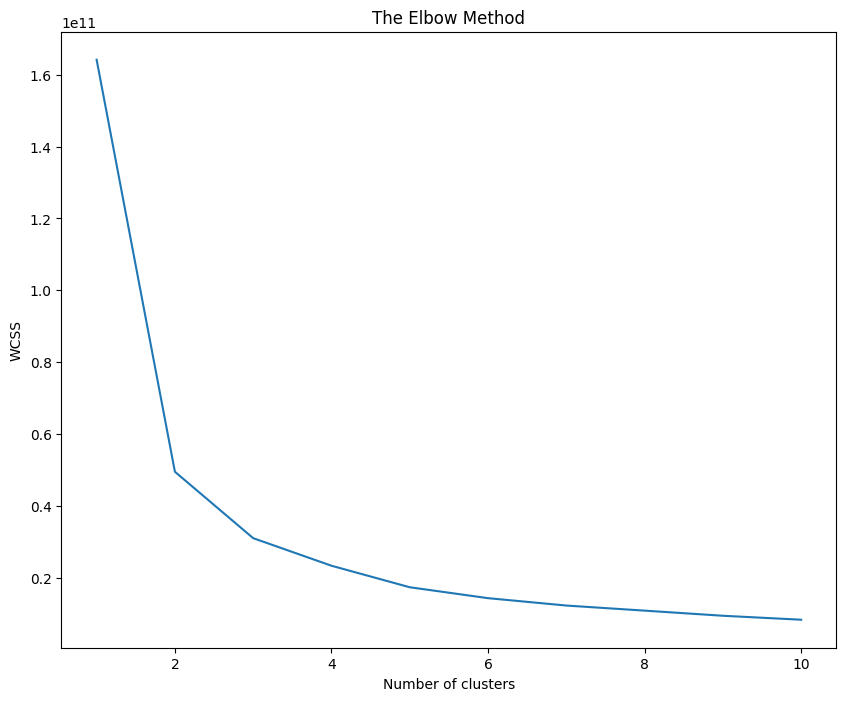

In [44]:
103
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(ss)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(ss)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
ss['cluster'] = cluster

In [47]:
kmeans_mean_cluster = pd.DataFrame(round(ss.groupby('cluster').mean(),1))
kmeans_mean_cluster

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,THEFT,HURT/GREVIOUS HURT
cluster,,,,,,,,,,,
1,18.4,415.1,2006.6,53.6,46.3,32.3,46.4,8.2,31.0,421.5,408.3
2,15.3,753.0,2006.1,2446.5,2080.2,1691.5,1440.4,299.4,1687.3,28595.5,35660.4
3,18.4,668.1,2007.2,1629.2,1475.6,867.6,1741.3,238.0,1077.8,14732.5,11530.2


In [48]:
ss.loc[ss['cluster']==3].describe()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,THEFT,HURT/GREVIOUS HURT,cluster
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.0
mean,18.410072,668.100719,2007.194245,1629.215827,1475.568345,867.618705,1741.323741,237.956835,1077.805755,14732.460432,11530.201439,3.0
std,9.992615,189.686175,3.372690,1465.784114,1464.087212,579.618183,1587.214538,267.733262,720.842400,6282.060005,7053.384582,0.0
min,3.000000,61.000000,2001.000000,203.000000,115.000000,65.000000,119.000000,14.000000,239.000000,4078.000000,1708.000000,3.0
25%,11.000000,753.000000,2004.500000,545.000000,446.500000,437.500000,581.000000,64.000000,559.500000,10555.500000,4394.500000,3.0
50%,17.000000,753.000000,2008.000000,1276.000000,756.000000,668.000000,1323.000000,177.000000,783.000000,14465.000000,10694.000000,3.0
75%,28.000000,753.000000,2010.000000,1767.500000,2010.000000,1224.500000,2533.000000,286.500000,1402.000000,18513.000000,18417.000000,3.0
max,34.000000,753.000000,2012.000000,7601.000000,7964.000000,2363.000000,8878.000000,1319.000000,3825.000000,37376.000000,26519.000000,3.0


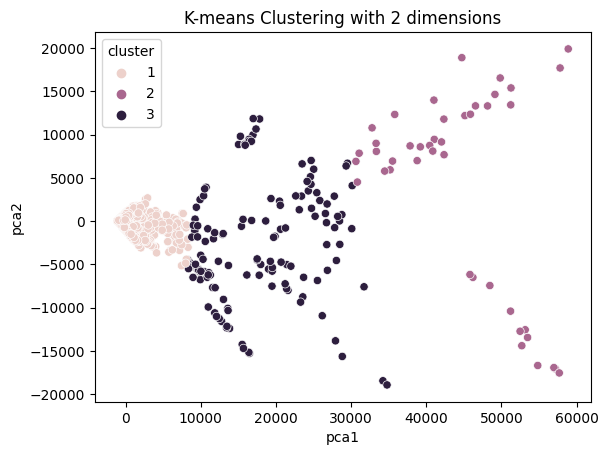

In [49]:
from sklearn.decomposition import PCA
import seaborn as sns

reduced_data = PCA(n_components=2).fit_transform(ss)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=ss['cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [21]:
features = [34.000000,	807.000000,	2012.000000,	2000000,3000000,400000,500000,60000,70000,88000,90000]
features = preprocessing.scale(features)
features = np.array(features)
#features = [-0.187047,	1.242241,	0.029374,	4.092380,	3.767156,	5.189940,	3.909795,	3.310869,	3.853561,	4.528076,	5.062492]
final_features = [np.array(features)]
y_pred = kmeans.predict(final_features)
if y_pred[0] == 0:         
    label="Low Crime Rate Area"
elif y_pred[0] == 1:
    label="Moderate Crime Rate Area"
elif y_pred[0] == 2:
    label = "High Crime Rate Area"
print(label)
#print(features)

Low Crime Rate Area
